In [115]:
from IPython.display import display
import spot
from spot.jupyter import display_inline
spot.setup()

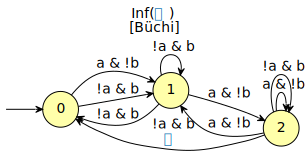

In [117]:
example=spot.automaton("""
HOA: v1
States: 3
Start: 0
name: "Hello world"
AP: 2 "a" "b"
properties: trans-acc
Acceptance: 1 Inf(0)
--BODY--
State: 0
[ 0&!1] 1
[!0& 1] 1
State: 1
[!0& 1] 0
[!0& 1] 1
[ 0&!1] 2
State: 2
[ 0&!1] 2
[!0& 1] 2
[ 0&!1] 1
[!0& 1] 0 {0}
--END--
""")
example.save("example_for_slim.hoa")

In [118]:
# Build the slim automaton [strong] using the local copy of seminator
! ../seminator --slim --pure example_for_slim.hoa > slim.hoa
# weak version
! ../seminator --slim --weak --pure example_for_slim.hoa > slim_weak.hoa
# Build example of breaking point automaton 
! ../seminator --bp --pure --scc-aware=0 example_for_slim.hoa > bp.hoa
# Build the semi-deterministic automaton using the installed version of seminator
! seminator --tba --pure --scc-aware=0 --postprocess=0 example_for_slim.hoa > semi_deterministic.hoa
# Build it using local copy to see if it works too
! ../seminator --tba --pure --scc-aware=0 --postprocess=0 example_for_slim.hoa > semi_deterministic_local.hoa

### Display automata
For a display side-by-side we use the display_inline function from Spot. We can see all the three automata there.

In [119]:
slim = spot.automaton("slim.hoa")
slim_weak = spot.automaton("slim_weak.hoa")
bp = spot.automaton("bp.hoa")
semidet = spot.automaton("semi_deterministic.hoa")
semidet_local = spot.automaton("semi_deterministic_local.hoa")
display_inline(slim, slim_weak)
print("breakpoint and semideterministic automata")
display_inline(bp, semidet, semidet_local)

breakpoint and semideterministic automata


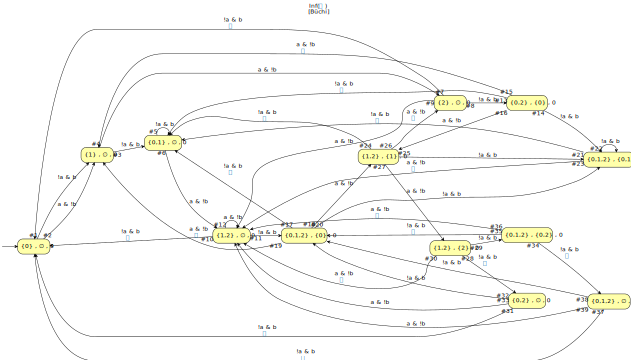

In [13]:
# Display the slim automaton with edge-numbers, we will use that for highlighting
slim.show(".#")

Below, the orange edge should not exist in the slim automaton. In case we reach a break-point, "slim-edges" are not created. (executed in old version below) 

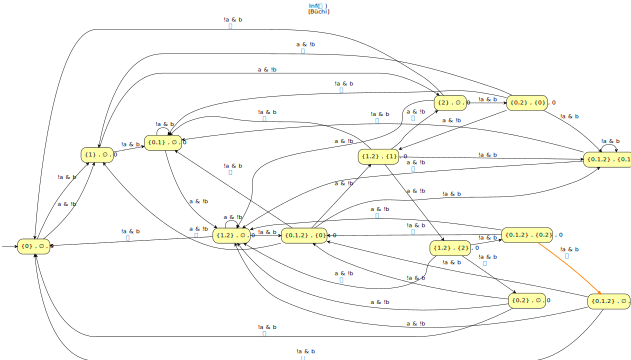

In [14]:
slim.highlight_edges([34], 2)

In [114]:
# Deterministic - nothing should happen

In [123]:
!ltl2tgba 'G(((a) R (!(b))) & ((b) R ((G(a)) | (X(c)))))' | seminator --slim > 1.hoa
!ltl2tgba 'G(((a) R (!(b))) & ((b) R ((G(a)) | (X(c)))))' | seminator --slim --weak > 2.hoa
!ltl2tgba 'G(((a) R (!(b))) & ((b) R ((G(a)) | (X(c)))))' | seminator > 4.hoa

In [124]:
slim = spot.automaton("1.hoa")
weak = spot.automaton("2.hoa")
dt = spot.automaton("4.hoa")
display_inline(slim,weak, dt)

In [125]:
# 2 state example with 2 acceptance sets
!echo 'G(F!a & (b U Xa))' > Garfield

!cat Garfield | ltl2tgba  > input.hoa
!cat input.hoa
!cat Garfield | ltl2tgba  | seminator --slim --pure > output.hoa
!cat Garfield | ltl2tgba  | seminator --slim --weak --pure > weak.hoa
!cat Garfield | ltl2tgba  | seminator --bp --pure> bp.hoa
!cat Garfield | ltl2tgba  | seminator  > det.hoa

inputek = spot.automaton("input.hoa")
outputek = spot.automaton("output.hoa")
weak = spot.automaton("weak.hoa")
bp = spot.automaton("bp.hoa")
det = spot.automaton("det.hoa")
outputek.show(".#")
#if just the highlighted edges would be accepting, automaton still should work the same
outputek.highlight_edges([14,16],2)
display_inline(inputek,outputek, weak, bp, det)

HOA: v1
name: "G(F!a & (b U Xa))"
States: 2
Start: 0
AP: 2 "b" "a"
acc-name: generalized-Buchi 2
Acceptance: 2 Inf(0)&Inf(1)
properties: trans-labels explicit-labels trans-acc
--BODY--
State: 0
[0&!1] 0 {1}
[0&1] 0
[!1] 1 {0 1}
[1] 1 {0}
State: 1
[0&1] 0
[1] 1 {0}
--END--


In [126]:
# 3 acceptance sets automation, tests failing on this before

!echo 'G(Fa | (Fb & Fc))' > Garfield

!cat Garfield | ltl2tgba  > input.hoa
#!cat input.hoa
!cat Garfield | ltl2tgba  | seminator --slim --pure > output.hoa

outputek = spot.automaton("output.hoa")
display_inline(outputek)